### 3

In [25]:
import pandas as pd

df = pd.read_csv('netflix_titles.csv')

### 4

In [ ]:
df.tail()

In [ ]:
df.head()

### 5
**Explanation** 
- Display the information of the DataFrame
    - Type of index,
    - Columns
    - Non-null values
    - Memory usage


In [ ]:
df.info()

### 6
**Explanation** 
- Display the dimensions of the DataFrame.


In [4]:
dimensions = df.shape
nb_rows, nb_columns = dimensions
print(f"Number of variables (columns): {nb_columns}")
print(f"Number of observations (rows): {nb_rows}")


Number of variables (columns): 12
Number of observations (rows): 8807


### 7
**Explanation** 
- Display the columns of the DataFrame

In [ ]:
columns = df.columns
print(columns)

### 8
**Explanation** 
*column_types[column_types.apply(lambda x: pd.api.types.is_numeric_dtype(x))]*
1. `apply()`
    - applies a function to each element of the series column_types
2. `lambda x`
    - pd.api.types.is_numeric_dtype(x) is a lambda function that checks if the type x is numeric using pd.api.types.is_numeric_dtype(x)
- This expression returns a series of boolean values (True or False), where True indicates that the corresponding column is numeric.


In [ ]:
column_types = df.dtypes

quantitative_columns = column_types[column_types.apply(lambda x: pd.api.types.is_numeric_dtype(x))]
qualitative_columns = column_types[column_types.apply(lambda x: pd.api.types.is_categorical_dtype(x) or pd.api.types.is_object_dtype(x))]

print("\nQuantitative columns:")
print(quantitative_columns)
print("\nQualitative columns:")
print(qualitative_columns)


### 9
**Explanation** 
1. `missing_data = df.isnull().sum()`
    - Creates a series `missing_data` with missing values per column.

2. `total_missing_data = df.isnull().sum().sum()`
    - Calculates total missing values in the DataFrame.

3. `missing_proportion = (missing_data / len(df)) * 100`
    - Calculates missing values proportion per column as a percentage.

4. `total_cells = df.size`
    - Calculates total number of cells in the DataFrame.

5. `total_missing_percentage = (total_missing_data / total_cells) * 100`
    - Calculates total missing values percentage across the DataFrame.

6. Displaying the results
    - `print("Missing data per column:")` displays missing values per column.   
    - `print(missing_data)` displays `missing_data`.
    - `print(f"Total percentage of missing data: {total_missing_percentage:.2f}%")` displays total missing values percentage.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_data = df.isnull().sum()
total_missing_data = df.isnull().sum().sum()
missing_proportion = (missing_data / len(df)) * 100
total_cells = df.size
total_missing_percentage = (total_missing_data / total_cells) * 100

plt.figure(figsize=(10,6))
sns.barplot(x=missing_data.index, y=missing_data.values, palette="Blues_r")
plt.xlabel('\n Column', fontsize=15, color='#2b50bf')
plt.ylabel("Nb Missing Data\n", fontsize=15, color='#2b50bf')
plt.title("Nb missing data per colomn\n", fontsize=18, color='#3b79e5')
plt.xticks(rotation= 45)
plt.tight_layout()

plt.show()

print("Total percentage of missing data:", total_missing_percentage)


### 10
**Explanation** 
1. `missing_data = df.isnull().sum()`
    - Creates a series `missing_data` with missing values per column.

2. `total_missing_data = df.isnull().sum().sum()`
    - Calculates total missing values in the DataFrame.

3. `missing_proportion = (missing_data / len(df)) * 100`
    - Calculates missing values proportion per column as a percentage.

In [ ]:
import missingno as msno
msno.bar(df)

### 11
**Explanation** 
1. `random_observation = df.sample()` 
   - Selects a random observation from the DataFrame df.
2. `print(random_observation)`
   - Displays the selected random observation.


In [ ]:
random_observation = df.sample()
print(random_observation)

### 12
**Explanation** 
1. `df['Titre'] == 'Catch Me If You Can'` 
   - Crée un masque booléen qui sélectionne toutes les lignes où la colonne "Titre" est égale à "Catch Me If You Can".
2. `df[...]`
   - Filtre le DataFrame en utilisant ce masque pour sélectionner toutes les informations relatives à l'œuvre "Catch Me If You Can".
3. `print(info_catch_me)`
    -  Affiche ces informations.

In [ ]:
info = df[df['title'] == 'Catch Me If You Can']
print(info)

### 13 | 14
**Explanation** 
1. `df.query("type == 'TV Show'")` or `df.query("type == 'Movie'")`
   - Filter the DataFrame to select only the films with type "Movie" or "TV Show"
1. `df.sort_values(by='release_year', ascending=False)` 
   - Sorts the DataFrame by the "release_year" column in descending order (from newest to oldest)
2. `.iloc[0]['Titre'] `
   - Selects the movie title in the first row (the most recent movie) of the sorted DataFrame
3. `print(f"The most recent film is : {most_recent_film}")`
    - Displays the name of the most recent movie

In [ ]:
most_recent_film = df.query("type == 'Movie'").sort_values(by='release_year', ascending=False).iloc[0]['title']
print(f"The most recent film is : {most_recent_film}")

In [ ]:
most_recent_tv_show = df.query("type == 'TV Show'").sort_values(by='release_year', ascending=False).iloc[0]['title']
print(f"The most recent film is : {most_recent_tv_show}")

### 15
**Explanation** 
1. `df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')`
   - Convert the date_added column to DateTime type
1. `print("date_added : ", df.dtypes['date_added'])` 
   - Display the data type of the date_added column.

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
print("date_added : ",df.dtypes['date_added'])

date_added :  datetime64[ns]


### 16
**Explanation** 
1. `df.loc[df['type'] == 'Movie', 'duration'].fillna('0 min')`
   - Fill missing values in the 'duration' column for movies ('Movie') with the string '0 min'
2. `df.loc[df['type'] == 'Movie', 'duration'] = ...` 
   - Assign the filled values (or existing values if they are not missing) to the 'duration' column only for movies ('Movie')


1. `df.loc[df['type'] == 'Movie', 'duration'].str.replace(' min', '')`
   - Remove the text ' min' from each value in the 'duration' column for movies ('Movie')
2. `.astype(int)` 
   - Convert the values in the 'duration' column (which are now strings representing numbers) to integers

In [ ]:
df.loc[df['type'] == 'Movie', 'duration'] = df.loc[df['type'] == 'Movie', 'duration'].fillna('0 min')
df.loc[df['type'] == 'Movie', 'duration'] = df.loc[df['type'] == 'Movie', 'duration'].str.replace(' min', '').astype(int)

print(df[df['type'] == 'Movie'][['type', 'duration']])


In [ ]:
df.loc[df['type'] == 'TV Show', 'duration'] = df.loc[df['type'] == 'TV Show', 'duration'].fillna('0')
df.loc[df['type'] == 'TV Show', 'duration'] = df.loc[df['type'] == 'TV Show', 'duration'].str.replace(r'\D', '').astype(int)

print(df['duration'])

### 18
**Explanation** 
1. `df['listed_in'] = ...` 
   - Replace the values in the 'listed_in' column with the new lists of genres obtained after splitting
2. `df['listed_in'].str.split(', ')`
   - Apply the split(', ') method to each element in the 'listed_in' column. This splits each string into a list of substrings using ', ' as a separator


In [27]:
df['listed_in'] = df['listed_in'].str.split(', ')

print(df['listed_in'])

0                                         [Documentaries]
1       [International TV Shows, TV Dramas, TV Mysteries]
2       [Crime TV Shows, International TV Shows, TV Ac...
3                                [Docuseries, Reality TV]
4       [International TV Shows, Romantic TV Shows, TV...
                              ...                        
8802                     [Cult Movies, Dramas, Thrillers]
8803             [Kids' TV, Korean TV Shows, TV Comedies]
8804                            [Comedies, Horror Movies]
8805                 [Children & Family Movies, Comedies]
8806     [Dramas, International Movies, Music & Musicals]
Name: listed_in, Length: 8807, dtype: object


### 19
**Explanation** 
1. `df['type'].value_counts()` 
   - This method counts the number of occurrences of each unique value in the 'type' column of the DataFrame df and returns the results as a series. Each unique value of the 'type' column is an index of the series, and the number of occurrences of that value is the value associated with that index.

In [ ]:
print("Unique values of 'type' with their occurrences:")
print(df['type'].value_counts())

print("\nUnique values of 'country' with their occurrences:")
print(df['country'].value_counts())

print("\nUnique values of 'release_year' with their occurrences:")
print(df['release_year'].value_counts())

print("\nUnique values of 'rating' with their occurrences:")
print(df['rating'].value_counts())

print("\nUnique values of 'listed_in' with their occurrences:")
print(df['listed_in'].explode().value_counts())


### 20
**This code counts the number of works directed by each director in the 'director' column, and then identifies directors who have directed more than one work.** 
1. `directors_count = df['director'].value_counts()` 
   - This line counts the occurrences of each director in the 'director' column and stores the results in the 'directors_count' variable
1. `prolific_directors = directors_count[directors_count > 1]` 
   - This line filters the directors who have directed more than one work by selecting values from 'directors_count' that are greater than 1. These directors are stored in the 'prolific_directors' variable

In [ ]:
directors_count = df['director'].value_counts()
prolific_directors = directors_count[directors_count > 1]

if not prolific_directors.empty:
    print("Directors who have produced more than one work:")
    print(prolific_directors)
else:
    print("No director has produced more than one work.")

### 21
**This code determines the year with the highest number of additions to the catalog and displays that year along with the corresponding number of additions.** 

1. `prolific_years = df['release_year'].value_counts()`
    - This line counts the number of works released for each year in the 'release_year' column and stores the results in the 'prolific_years' variable. This gives a count of the number of works released per year
2. `most_prolific_year = prolific_years.idxmax()`
    - This line retrieves the year with the highest number of additions to the catalog using the idxmax() method on the 'prolific_years' variable. This returns the index of the year with the maximum value
3. `number_of_films = prolific_years.max()`
    - This line retrieves the maximum number of additions to the catalog using the max() method on the 'prolific_years' variable

In [ ]:
prolific_years = df['release_year'].value_counts()

most_prolific_year = prolific_years.idxmax()
number_of_films = prolific_years.max()

print(f"Year with the most additions to the catalog: {most_prolific_year}")
print(f"Number of additions to the catalog in that year: {number_of_films}")

### 22
**This code identifies the year with the highest number of TV shows added to the catalog, as well as the number of TV shows added in that year**

1. `tv_show_prolific_years = df.loc[df['type'] == 'TV Show', 'release_year'].value_counts()`
    - This line filters the entries in the 'release_year' column for which the type is "TV Show", then counts the number of TV shows for each year. The results are stored in the 'tv_show_prolific_years' variable, which contains a count of the number of TV shows added per year.
2. `tv_show_most_prolific_year = tv_show_prolific_years.idxmax()`
    - This line retrieves the year with the highest number of TV shows added to the catalog using the idxmax() method on the 'tv_show_prolific_years' variable. This returns the index of the year with the maximum value.
3. `number_of_tv_shows = tv_show_prolific_years.max()`
    - This line retrieves the maximum number of TV shows added to the catalog using the max() method on the 'tv_show_prolific_years' variable.

In [ ]:
tv_show_prolific_years = df.loc[df['type'] == 'TV Show','release_year'].value_counts()

tv_show_most_prolific_year = tv_show_prolific_years.idxmax()
number_of_tv_shows = tv_show_prolific_years.max()

print(f"Year with the most TV shows added to the catalog: {tv_show_most_prolific_year}")
print(f"Number of additions to the catalog in that year: {number_of_tv_shows}")

### 23 a
**This code creates a bar chart to represent the distribution of different types of works in the DataFrame.**

1. `import matplotlib.pyplot as plt`: Imports the matplotlib.pyplot module for plotting graphs.
2. `cmap = plt.get_cmap('viridis')`: Creates a 'viridis' colormap using Matplotlib's get_cmap() function. This sets the colors used in the graph.
3. `type_counts = df['type'].value_counts()`: Counts the number of works of each type in the 'type' column of the DataFrame and stores the results in the 'type_counts' variable.
4. `plt.figure(figsize=(3, 6))`: Creates a new figure with a size of 3 inches wide and 6 inches tall.
5. `type_counts.plot(kind='bar', color=[cmap(0.2), cmap(0.8)])`: Plots a bar chart using the values in 'type_counts'. The colors of the bars are set using the 'viridis' colormap. The color of the first bar corresponds to the color at 20% of the 'viridis' color scale, and the color of the second bar corresponds to the color at 80% of the scale.
6. `plt.title("Distribution of types of works")`: Adds a title to the graph.
7. `plt.xlabel("Type of work")`: Adds a label to the x-axis.
8. `plt.ylabel("Number of works")`: Adds a label to the y-axis.
9. `plt.xticks(rotation=0)`: Rotates the x-axis labels to 0 degrees.
10. `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adds a grid to the y-axes with a dashed line style and transparency of 0.7.
11. `plt.tight_layout()`: Adjusts the layout of the graph to avoid the title being cut off.
12. `plt.show()`: Displays the graph.

In [ ]:
import matplotlib.pyplot as plt
cmap = plt.get_cmap('viridis')

type_counts = df['type'].value_counts()

plt.figure(figsize=(4, 5))
type_counts.plot(kind='bar', color=[cmap(0.5), cmap(0.3)])  
plt.title("Distribution of types")
plt.xlabel("Type")
plt.ylabel("Number")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 23 b
1. **Imports**:
   - `import numpy as np`: Imports the NumPy module for mathematical operations.
   
2. **Counting works by country**:
   - `top_countries = df['country'].value_counts().head(15)`: Counts the number of works by country and selects the top 15 countries with the highest number of works.
   - `other_countries = df['country'].value_counts().tail(-15)`: Counts the number of works for countries other than the top 15.
   - `other_countries_sum = other_countries.sum()`: Calculates the sum of the number of works for countries other than the top 15.
   
3. **Creating the data series**:
   - `all_countries = pd.concat([top_countries, pd.Series(other_countries_sum, index=['Other Countries'])])`: Combines the top 15 countries with the sum of other countries into a single data series.
   
4. **Sorting countries in descending order**:
   - `all_countries_sorted = all_countries.sort_values(ascending=False)`: Sorts the countries in descending order based on the number of works.
   
5. **Creating the colormap**:
   - `cmap = plt.get_cmap('viridis')`: Gets a 'viridis' colormap from Matplotlib.
   - `colors = cmap(np.linspace(0, 1, len(all_countries_sorted)))`: Generates a list of colors based on the number of countries.
   
6. **Creating the bar chart**:
   - `plt.figure(figsize=(12, 6))`: Creates a new figure with a size of 12 inches wide and 6 inches high.
   - `all_countries_sorted.plot(kind='bar', color=colors)`: Plots a bar chart using the sorted data and generated colors.
   
7. **Adding titles and labels**:
   - `plt.title("Distribution of works by country")`: Adds a title to the chart.
   - `plt.xlabel("Country")`: Adds a label to the x-axis.
   - `plt.ylabel("Number of works")`: Adds a label to the y-axis.
   - `plt.xticks(rotation=45)`: Rotates the x-axis labels for better readability.
   
8. **Adding gridlines and adjusting layout**:
   - `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adds gridlines to the y-axis with a dashed line style and 0.7 transparency.
   - `plt.tight_layout()`: Adjusts the layout of the chart to prevent the title from being cut off.
   
9. **Displaying the chart**:
   - `plt.show()`: Displays the chart.

In [ ]:
import numpy as np

top_countries = df['country'].value_counts().head(15)

other_countries = df['country'].value_counts().tail(-15)
other_countries_sum = other_countries.sum()

all_countries = pd.concat([top_countries, pd.Series(other_countries_sum, index=['Other Countries'])])

all_countries_sorted = all_countries.sort_values(ascending=False)

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(all_countries_sorted)))

plt.figure(figsize=(12, 6))
all_countries_sorted.plot(kind='bar', color=colors)
plt.title("Distribution of works by country")
plt.xlabel("Country")
plt.ylabel("Number of works")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 23 c

1. `top_years = df['release_year'].value_counts().head(15)`: Counts the occurrences of each release year in the 'release_year' column, then selects the top 15 years with the highest counts.
2. `other_years = df['release_year'].value_counts().tail(-15)`: Counts the occurrences of each release year, excluding the top 15 years, then selects the rest.
3. `other_years_sum = other_years.sum()`: Calculates the total count of works for the other years.
4. `all_years = pd.concat([top_years, pd.Series(other_years_sum, index=['Other Years'])])`: Concatenates the top years and the sum of other years into a single DataFrame, with the label 'Other Years'.
5. `all_years = all_years.sort_values(ascending=False)`: Sorts the years in descending order based on the number of works.
6. `cmap = plt.get_cmap('viridis')`: Retrieves the 'viridis' colormap.
7. `colors = cmap(np.linspace(0, 1, len(all_years)))`: Generates a range of colors from the colormap corresponding to the number of years.
8. Plot the bar chart with the sorted data, using the colors generated.
9. Adds titles, labels, and grid lines to the plot for clarity.
10. Displays the plot.

In [ ]:
top_years = df['release_year'].value_counts().head(15)
other_years = df['release_year'].value_counts().tail(-15)
other_years_sum = other_years.sum()
all_years = pd.concat([top_years, pd.Series(other_years_sum, index=['Other Years'])])

all_years = all_years.sort_values(ascending=False)

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(all_years)))

plt.figure(figsize=(12, 6))
all_years.plot(kind='bar', color=colors)
plt.title("Distribution of works by years")
plt.xlabel("Years")
plt.ylabel("Number of works")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 23 d
1. `df['rating'] = df['rating'].astype(str) ` Converts the 'rating' column to string type. This ensures that the ratings are treated as categorical data when plotting.
2.  `plt.figure(figsize=(8, 6)) ` Creates a new figure for the plot with a size of 8x6 inches.
3.  `df['rating'].value_counts().sort_index().plot(kind='bar', color='blue') ` Counts the occurrences of each rating value, sorts them by index (rating value), and plots them as a bar chart with blue color.
4. `plt.title('Distribution of Ratings') ` Adds a title to the plot.
5. `plt.xlabel('Rating') ` Adds a label to the x-axis indicating the rating.
6. `plt.ylabel('Number of Films') ` Adds a label to the y-axis indicating the number of films.
7. `plt.grid(False) ` Turns off the grid lines for better visualization.
8. `plt.show() ` Displays the plot.

In [ ]:
df['rating'] = df['rating'].astype(str)

plt.figure(figsize=(8, 6))
df['rating'].value_counts().sort_index().plot(kind='bar', color='blue')

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Films')

plt.grid(False)
plt.show()

### 23 e

1. `df.loc[df['type'] == 'Movie', 'duration'] = df.loc[df['type'] == 'Movie', 'duration'].fillna(0)`: Fills missing values in the 'duration' column with 0 for movies.

2. `df.loc[df['type'] == 'Movie', 'duration'] = df.loc[df['type'] == 'Movie', 'duration'].apply(lambda x: int(x.replace(' min', '')) if isinstance(x, str) else x)`: Converts the 'duration' values to integers, removing the 'min' suffix, if applicable.

3. `bins = range(0, int(df.loc[df['type'] == 'Movie', 'duration'].max()) + 31, 30)`: Defines the bins for the histogram, starting from 0 and incrementing by 30 minutes up to the maximum duration of movies plus 30 minutes.

4. `plt.figure(figsize=(18,5))`: Creates a figure with a size of 18x5 inches for the plot.

5. `movie_durations = df.loc[df['type'] == 'Movie']['duration']`: Selects the movie durations from the DataFrame.

6. `duration_counts = pd.cut(movie_durations, bins=bins, right=False).value_counts().sort_index()`: Categorizes the movie durations into the defined bins, counts the number of movies in each bin, and sorts the bins by index.

7. `duration_counts.plot(kind='bar', color='blue')`: Plots a bar chart of the duration counts, using color blue

8. `plt.xticks(range(len(duration_counts)), [f'{i.left}-{i.right-1}' for i in duration_counts.index], rotation=45)`: Sets the x-axis ticks to display the range of each bin, with a rotation of 45 degrees for better readability.

9. `plt.title('Distribution of Movie Durations in 30-minute Bins')`: Sets the title of the plot.

10. `plt.xlabel('Duration in minutes')`: Sets the label for the x-axis.

11. `plt.ylabel('Number of Movies')`: Sets the label for the y-axis.

12. `plt.grid(False)`: Turns off the grid lines for the plot.

13. `plt.show()`: Displays the plot.

C:\Users\inesl\AppData\Local\Temp\ipykernel_23116\194395745.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[df['type'] == 'Movie', 'duration'] = df.loc[df['type'] == 'Movie', 'duration'].fillna(0)


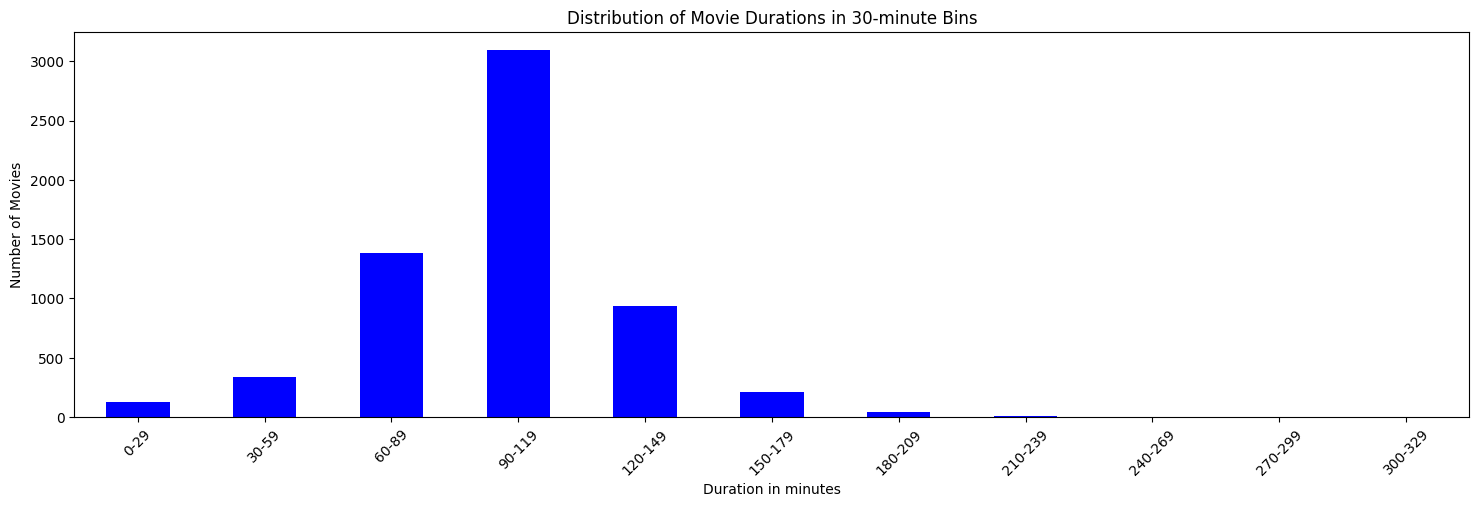

In [76]:
df.loc[df['type'] == 'Movie', 'duration'] = df.loc[df['type'] == 'Movie', 'duration'].fillna(0)
df.loc[df['type'] == 'Movie', 'duration'] = df.loc[df['type'] == 'Movie', 'duration'].apply(lambda x: int(x.replace(' min', '')) if isinstance(x, str) else x)

bins = range(0, int(df.loc[df['type'] == 'Movie', 'duration'].max()) + 31, 30)

plt.figure(figsize=(18,5))

movie_durations = df.loc[df['type'] == 'Movie']['duration']

duration_counts = pd.cut(movie_durations, bins=bins, right=False).value_counts().sort_index()

duration_counts.plot(kind='bar', color='blue')

plt.title('Distribution of Movie Durations in 30-minute Bins')
plt.xlabel('Duration in minutes')
plt.ylabel('Number of Movies')

plt.xticks(range(len(duration_counts)), [f'{i.left}-{i.right-1}' for i in duration_counts.index], rotation=45)

plt.grid(False)
plt.show()


### 23 f
1. **Importing Regular Expressions Module:**
   - The code imports the regular expressions module using `import re`.

2. **Filling Missing Values:**
   - The code fills missing values in the 'duration' column for TV shows with 0.
   - It uses the `fillna()` method to replace NaN values with 0 for TV shows.

3. **Extracting Number of Seasons:**
   - Regular expressions are used to find and extract the numeric part from each 'duration' value (assuming it represents the number of seasons).
   - The `re.search()` function is applied to each 'duration' value to find the numeric part.
   - If a numeric part is found, it is extracted using `.group()` and converted to an integer using `int()`.
   - This operation is performed using a lambda function within the `apply()` method.

4. **Creating the Plot:**
   - The code creates a figure with a size of 18x8 inches for the plot using `plt.figure(figsize=(18,8))`.

5. **Selecting TV Show Durations:**
   - TV show durations are selected from the DataFrame using `df.loc[df['type'] == 'TV Show']['duration']`.

6. **Counting Duration Occurrences:**
   - The occurrences of each duration (number of seasons) are counted using `value_counts()` and sorted in ascending order using `sort_index()`.

7. **Plotting the Bar Chart:**
   - A bar chart of TV show durations is plotted using `plot(kind='bar', color='blue')`.

8. **Adding Title and Labels:**
   - A title ('Distribution of TV Show Durations') and axis labels ('Number of Seasons' for x-axis and 'Number of TV Shows' for y-axis) are added to the plot using `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` functions, respectively.

9. **Turning off Grid Lines:**
   - Grid lines are turned off for better visualization using `plt.grid(False)`.

10. **Showing the Plot:**
    - Finally, the plot is displayed using `plt.show()`.


In [ ]:
import re

df.loc[df['type'] == 'TV Show', 'duration'] = df.loc[df['type'] == 'TV Show', 'duration'].fillna(0)

df.loc[df['type'] == 'TV Show', 'duration'] = df.loc[df['type'] == 'TV Show', 'duration'].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else x)

plt.figure(figsize=(18,8))

tv_show_durations = df.loc[df['type'] == 'TV Show']['duration']

duration_counts = tv_show_durations.value_counts().sort_index()

duration_counts.plot(kind='bar', color='blue')

plt.title('Distribution of TV Show Durations')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')

plt.grid(False)
plt.show()

### 23 g
1. **Creating the Plot:**
   - The code creates a figure with a size of 18x5 inches for the plot using `plt.figure(figsize=(18,5))`.

2. **Counting Categories:**
   - The `explode()` method is applied to the 'listed_in' column to split the comma-separated genres into separate rows.
   - Then, the `value_counts()` method counts the occurrences of each genre category.

3. **Plotting the Bar Chart:**
   - A bar chart of genre categories is plotted using `plot(kind='bar', color='blue')`.
   - Each bar represents the count of works in a specific genre category.

4. **Adding Title and Labels:**
   - A title ('Distribution of Works by Genre') and axis labels ('Genres' for x-axis and 'Number of Works' for y-axis) are added to the plot using `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` functions, respectively.

5. **Turning off Grid Lines:**
   - Grid lines are turned off for better visualization using `plt.grid(False)`.

6. **Showing the Plot:**
   - Finally, the plot is displayed using `plt.show()`.


In [ ]:
plt.figure(figsize=(20,5))

categories = df['listed_in'].explode().value_counts()

categories.plot(kind='bar', color='blue')

plt.title('Distribution of Works by Genre')
plt.xlabel('Genres')
plt.ylabel('Number of Works')

plt.grid(False)
plt.show()